<a href="https://colab.research.google.com/github/superuser-11/ML_Labs/blob/main/sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Change directory to your folder
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Tools')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
# from lab_utils_multi import  load_house_data
# from lab_utils_common import dlc
import pandas as pd
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

In [64]:
data = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/Tools/houses.txt", delimiter=',')
# load the dataset
X_train = data[:, :4]   # Features → columns 0,1,2,3
y_train = data[:, 4]    # Target → column 4 (price)

X_features = ['size(sqft)','bedrooms','floors','age']


# --- Extra: inspect with pandas ---
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tools/houses.txt", sep=",", header=None)
df.columns = ['size(sqft)','bedrooms','floors','age','price']

print(df[['size(sqft)','bedrooms','floors','age']].describe())

        size(sqft)    bedrooms      floors         age
count   100.000000  100.000000  100.000000  100.000000
mean   1413.710000    2.710000    1.380000   38.650000
std     414.249286    0.655898    0.487832   25.914925
min     788.000000    0.000000    1.000000   12.000000
25%    1091.000000    2.000000    1.000000   17.000000
50%    1405.500000    3.000000    1.000000   25.000000
75%    1657.000000    3.000000    2.000000   57.250000
max    3194.000000    4.000000    2.000000  107.000000


In [15]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.84 6.13 2.06 3.68]


In [16]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 124, number of weight updates: 12401.0


In [17]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [110.22 -21.22 -32.38 -37.85], b:[362.25]


In [18]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b.
y_pred = np.dot(X_norm, w_norm) + b_norm
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[248.55 295.58 485.85 389.78]
Target values 
[271.5 300.  509.8 394. ]


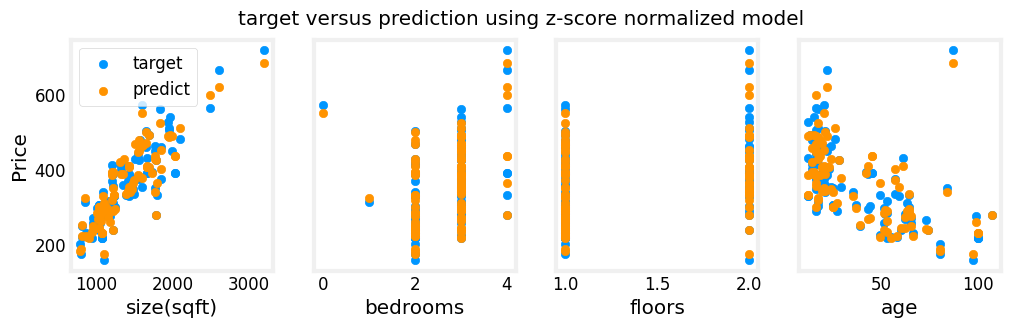

In [19]:
# plot predictions and targets vs original features
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [71]:
# unseen data
square_feet = int(input("Enter the square feet: "))
num_bedrooms = int(input("Enter the number of bedrooms: "))
floor = int(input("Enter the floor number: "))
house_age = int(input("Enter the age of house: "))

new_house = [[square_feet, num_bedrooms, floor, house_age]]
print(new_house)   # size=1200sqft, 3 bedrooms, 1 floor, 10 years old




Enter the square feet: 800
Enter the number of bedrooms: 2
Enter the floor number: 1
Enter the age of house: 12
[[800, 2, 1, 12]]


In [72]:
#normalization
new_house_norm = scaler.transform(new_house)
print(f"The normalized value of new house is: {new_house_norm}")


The normalized value of new house is: [[-1.49 -1.09 -0.78 -1.03]]


In [73]:
predicted_price = sgdr.predict(new_house_norm)
price_value = predicted_price[0]

print(f"The predicted price for this house is ${price_value:,.0f}K")


The predicted price for this house is $286K


In [77]:
# ---- SAVE ----
import pickle

with open("/content/house_price_model.pkl", "wb") as f:
    pickle.dump((scaler, sgdr), f)

print("✅ Model saved!")

# ---- LOAD ----
with open("/content/house_price_model.pkl", "rb") as f:
    scaler, sgdr = pickle.load(f)

print("✅ Model loaded!")


✅ Model saved!
✅ Model loaded!


In [78]:
from google.colab import files
files.download("/content/house_price_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>